In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("hotel_bookings.csv")

In [3]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [4]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                              507
market_segment                         2
distribution_channel                   1
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        0
deposit_type                          21
agent                              16340
company         

### For handling empty data on adults column

In [5]:
empty_adults=data[data['adults'].isna()]
empty_adults

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
740,Resort Hotel,1,74,2015,July,31,27,1,3,NaN,...,No Deposit,171.0,NaN,0,Transient,107.0,0,1,Canceled,29/06/2015


In [6]:
adults_median = data['adults'].median()
data['adults_filled']=data['adults'].fillna(adults_median)

In [7]:
data['adults_filled'].isna().sum()

0

### For children

In [8]:
data['children'].isna().sum()

4

In [9]:
empty_children=data[data['children'].isna()]
empty_children['children']

40600   NaN
40667   NaN
40679   NaN
41160   NaN
Name: children, dtype: float64

In [10]:
children_median = data['children'].median()
children_median

0.0

In [11]:
data['children_filled']=data['children'].fillna(children_median)

In [12]:
data['children_filled'].isna().sum()

0

In [13]:
data['children_filled']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children_filled, Length: 119390, dtype: float64

### For countries

In [14]:
data['country'].isna().sum()

507

In [15]:
mode_country = data['country'].mode()[0]
mode_country

'PRT'

In [16]:
data['country_filled']=data['country'].fillna(mode_country)

In [17]:
data['country_filled'].isna().sum()

0

### For Market Segment

In [18]:
data['market_segment']

0                Direct
1                Direct
2                Direct
3             Corporate
4             Online TA
              ...      
119385    Offline TA/TO
119386        Online TA
119387        Online TA
119388        Online TA
119389        Online TA
Name: market_segment, Length: 119390, dtype: object

In [19]:
mode_market = data['market_segment'].mode()[0]
mode_market

'Online TA'

In [20]:
data['market_segment_filled']=data['market_segment'].fillna(mode_market)
data['market_segment_filled']

0                Direct
1                Direct
2                Direct
3             Corporate
4             Online TA
              ...      
119385    Offline TA/TO
119386        Online TA
119387        Online TA
119388        Online TA
119389        Online TA
Name: market_segment_filled, Length: 119390, dtype: object

In [21]:
data['market_segment_filled'].isna().sum()

0

### For distribution channel

In [22]:
data['distribution_channel']

0            Direct
1            Direct
2            Direct
3         Corporate
4             TA/TO
            ...    
119385        TA/TO
119386        TA/TO
119387        TA/TO
119388        TA/TO
119389        TA/TO
Name: distribution_channel, Length: 119390, dtype: object

In [23]:
mode_channel = data['distribution_channel'].mode()[0]
mode_channel

'TA/TO'

In [24]:
data['distribution_channel_filled']=data['distribution_channel'].fillna(mode_channel)
data['distribution_channel_filled']

0            Direct
1            Direct
2            Direct
3         Corporate
4             TA/TO
            ...    
119385        TA/TO
119386        TA/TO
119387        TA/TO
119388        TA/TO
119389        TA/TO
Name: distribution_channel_filled, Length: 119390, dtype: object

In [25]:
data['distribution_channel_filled'].isna().sum()

0

### For reserved room type and assigned room type

In [26]:
data['reserved_room_type']

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type, Length: 119390, dtype: object

In [27]:
data['assigned_room_type']

0         C
1         C
2         C
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: assigned_room_type, Length: 119390, dtype: object

In [29]:
mode_reserved = data['reserved_room_type'].mode()[0]
mode_reserved

'A'

In [30]:
mode_assigned = data['assigned_room_type'].mode()[0]
mode_assigned

'A'

In [31]:
data['reserved_room_type_filled']=data['reserved_room_type'].fillna(mode_reserved)
data['reserved_room_type_filled']

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type_filled, Length: 119390, dtype: object

In [32]:
data['assigned_room_type_filled']=data['assigned_room_type'].fillna(mode_assigned)
data['assigned_room_type_filled']

0         C
1         C
2         C
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: assigned_room_type_filled, Length: 119390, dtype: object

In [33]:
data['reserved_room_type_filled'].isna().sum()

0

In [34]:
data['assigned_room_type_filled'].isna().sum()

0

In [99]:
data.to_csv('hotel_bookings_modifieddd.csv', index=False)

### For deposit type

In [35]:
data['deposit_type']

0         No Deposit
1         No Deposit
2         No Deposit
3         No Deposit
4         No Deposit
             ...    
119385    No Deposit
119386    No Deposit
119387    No Deposit
119388    No Deposit
119389    No Deposit
Name: deposit_type, Length: 119390, dtype: object

In [36]:
data['deposit_type'].isna().sum()

21

In [37]:
mode_deposit = data['deposit_type'].mode()[0]
mode_deposit

'No Deposit'

In [38]:
data['deposit_type_filled']=data['deposit_type'].fillna(mode_deposit)
data['deposit_type_filled']

0         No Deposit
1         No Deposit
2         No Deposit
3         No Deposit
4         No Deposit
             ...    
119385    No Deposit
119386    No Deposit
119387    No Deposit
119388    No Deposit
119389    No Deposit
Name: deposit_type_filled, Length: 119390, dtype: object

In [39]:
data['deposit_type_filled'].isna().sum()

0

### For agent and company

In [40]:
data['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [41]:
data['company']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64

In [42]:
# Let 0 be undefined ids of agent and company
data['agent_filled']=data['agent'].fillna(0)
data['company_filled']=data['company'].fillna(0)

In [43]:
data['agent_filled'].isna().sum()

0

In [44]:
data['company_filled'].isna().sum()

0

### For customer type

In [45]:
data['customer_type']

0         Transient
1         Transient
2         Transient
3         Transient
4         Transient
            ...    
119385    Transient
119386    Transient
119387    Transient
119388    Transient
119389    Transient
Name: customer_type, Length: 119390, dtype: object

In [46]:
mode_customer = data['customer_type'].mode()[0]
data['customer_type_filled']=data['customer_type'].fillna(mode_customer)
data['customer_type_filled'].isna().sum()

0

### For Reservation status

In [47]:
data['reservation_status']

0         Check-Out
1         Check-Out
2         Check-Out
3         Check-Out
4         Check-Out
            ...    
119385    Check-Out
119386    Check-Out
119387    Check-Out
119388    Check-Out
119389    Check-Out
Name: reservation_status, Length: 119390, dtype: object

In [48]:
data['reservation_status'].isna().sum()

1

In [49]:
data.dropna(subset=['reservation_status'], inplace=True)

In [50]:
data['reservation_status'].isna().sum()

0

### Marks the ending of filling null values and imputation 

### 2. Descriptive Status

Calculate summary statistics (mean, median, mode, standard deviation, etc.) for
numerical columns like lead_time, stays_in_weekend_nights,
stays_in_week_nights, adults, children, babies, previous_cancellations,
previous_bookings_not_canceled, days_in_waiting_list, adr,
required_car_parking_spaces, and total_of_special_requests.

In [51]:
# Calculation of mean,median,mode,sd of the following columns.
# a. Lead_time
lead_time_mean = data['lead_time'].mean()
print(f"The mean value of lead_time is: ",lead_time_mean)

lead_time_median = data['lead_time'].median()
print("The median value is: ",lead_time_median)

lead_time_mode = data['lead_time'].mode()[0]
print("The mode value is: ",lead_time_mode)

# b. Stays_in_weekend_nights
print("\n")
stays_in_weekend_nights_mean = data['stays_in_weekend_nights'].mean()
print(f"The mean value of stays_in_weekend_nights is: ",stays_in_weekend_nights_mean)

stays_in_weekend_nights_median = data['stays_in_weekend_nights'].median()
print("The median value is: ",stays_in_weekend_nights_median)

stays_in_weekend_nights_mode = data['stays_in_weekend_nights'].mode()[0]
print("The mode value is: ",stays_in_weekend_nights_mode)

# c. Stays_in_week_nights
print("\n")
stays_in_week_nights_mean = data['stays_in_week_nights'].mean()
print(f"The mean value of lead_time is: ",stays_in_week_nights_mean)

stays_in_week_nights_median = data['stays_in_week_nights'].median()
print("The median value is: ",stays_in_week_nights_median)

stays_in_week_nights_mode = data['stays_in_week_nights'].mode()[0]
print("The mode value is: ",stays_in_week_nights_mode)

The mean value of lead_time is:  104.0113410783238
The median value is:  69.0
The mode value is:  0


The mean value of stays_in_weekend_nights is:  0.9275896439370461
The median value is:  1.0
The mode value is:  0


The mean value of lead_time is:  2.5002722193836955
The median value is:  2.0
The mode value is:  2


In [52]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adults_filled,children_filled,agent_filled,company_filled
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119388.000000,119385.000000,119389.000000,...,103049.000000,6797.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370419,104.011341,2016.156564,27.165158,15.798239,0.927590,2.500272,1.856401,0.103891,0.007949,...,86.693573,189.266735,2.321169,101.831168,0.062518,0.571368,1.856402,0.103887,74.828385,10.775247
std,0.482919,106.863541,0.707471,13.605194,8.780866,0.998613,1.908267,0.579266,0.398563,0.097437,...,110.775068,131.655015,17.594793,50.535999,0.245292,0.792800,0.579263,0.398557,107.142399,53.944101
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2.000000,0.000000,7.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000,2.000000,0.000000,9.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2.000000,0.000000,152.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,10.000000,535.000000,543.000000


In [53]:
data.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,country_filled,market_segment_filled,distribution_channel_filled,reserved_room_type_filled,assigned_room_type_filled,deposit_type_filled,customer_type_filled
count,119389,119389,119389,118882,119387,119388,119388,119388,119368,119358,119389,119389,119389,119389,119389,119389,119389,119389,119389
unique,2,12,5,177,8,5,10,12,3,4,3,926,177,8,5,10,12,3,4
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015,PRT,Online TA,TA/TO,A,A,No Deposit,Transient
freq,79330,13877,92309,48570,56477,97868,85993,74052,104630,89585,75165,1461,49077,56479,97869,85994,74053,104651,89616


### Data Visualization

In [97]:
# Histogram for is_canceled

(array([75165.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 44224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

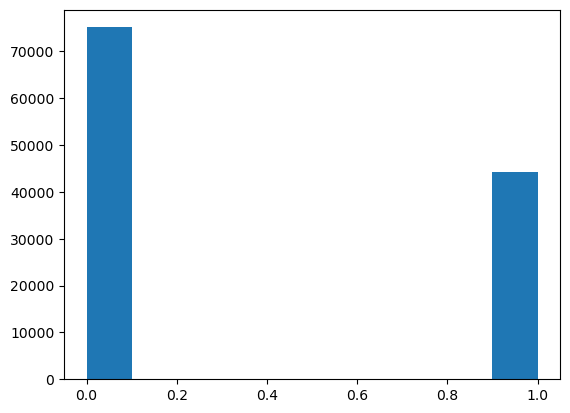

In [54]:
is_cancelled = data['is_canceled']
plt.hist(is_cancelled)

In [105]:
# Bar plots

In [55]:
years = data['arrival_date_year']
years

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: arrival_date_year, Length: 119389, dtype: int64

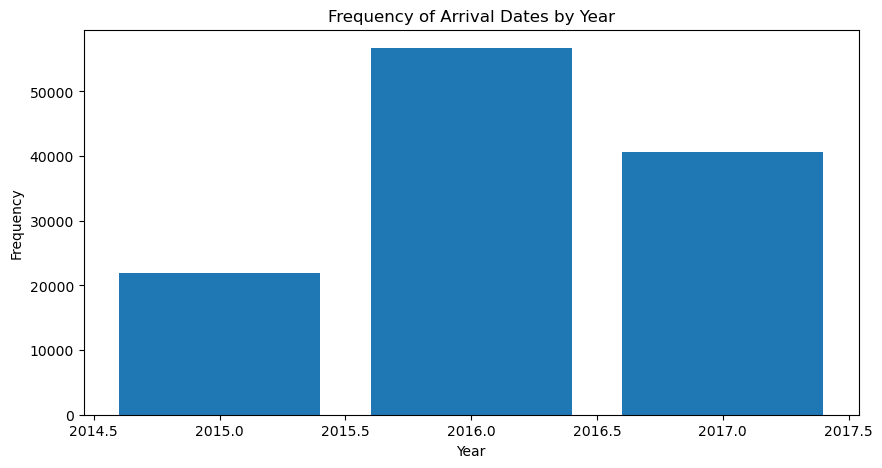

In [56]:
year_counts = data['arrival_date_year'].value_counts().sort_index()
years = year_counts.index
counts = year_counts.values
plt.figure(figsize=(10, 5))
plt.title('Frequency of Arrival Dates by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.bar(years,counts)
plt.show()

### Scatter Plot

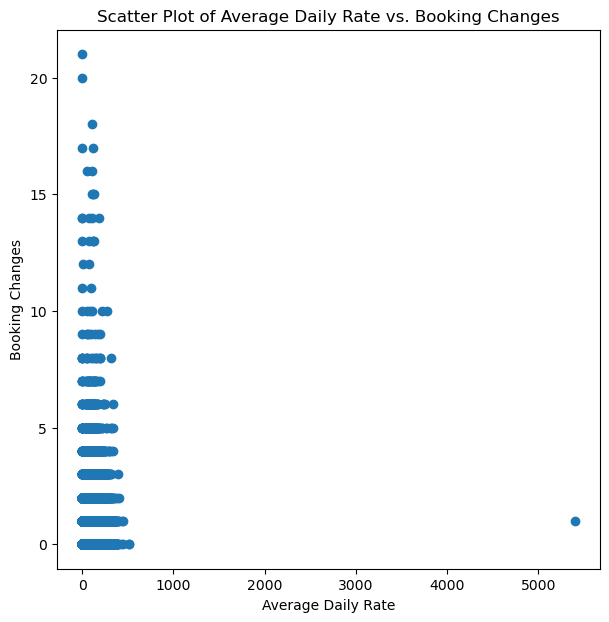

In [59]:
# Scatter plot of: Average Daily Rate vs. Booking Changes (not related)
plt.figure(figsize=(7, 7))
plt.scatter(x=data['adr'], y=data['booking_changes'])
plt.title('Scatter Plot of Average Daily Rate vs. Booking Changes')
plt.xlabel('Average Daily Rate')
plt.ylabel('Booking Changes')
plt.show()

### Correlation Analysis

In [60]:
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adults_filled,children_filled,agent_filled,company_filled
is_canceled,1.000000,0.293125,0.016650,0.008149,-0.006130,-0.001784,0.024777,0.060017,0.005046,-0.032492,...,-0.083116,-0.020642,0.054185,0.047556,-0.195500,-0.234663,0.060019,0.005035,-0.046530,-0.082996
lead_time,0.293125,1.000000,0.040144,0.126871,0.002268,0.085671,0.165800,0.119519,-0.037622,-0.020915,...,-0.069741,0.151464,0.170084,-0.063077,-0.116450,-0.095712,0.119519,-0.037613,-0.012640,-0.086250
arrival_date_year,0.016650,0.040144,1.000000,-0.540566,-0.000221,0.021512,0.030909,0.029643,0.054621,-0.013193,...,0.063455,0.259095,-0.056499,0.197581,-0.013688,0.108523,0.029639,0.054633,0.056463,0.033879
arrival_date_week_number,0.008149,0.126871,-0.540566,1.000000,0.066809,0.018207,0.015556,0.025908,0.005519,0.010396,...,-0.031201,-0.076760,0.022933,0.075791,0.001921,0.026150,0.025909,0.005515,-0.018244,-0.032750
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016355,-0.028174,-0.001569,0.014544,-0.000230,...,0.001487,0.044858,0.022728,0.030245,0.008684,0.003062,-0.001566,0.014553,0.000202,0.003724
stays_in_weekend_nights,-0.001784,0.085671,0.021512,0.018207,-0.016355,1.000000,0.498962,0.091869,0.045796,0.018484,...,0.140742,0.066749,-0.054150,0.049343,-0.018552,0.072678,0.091869,0.045796,0.161429,-0.079976
stays_in_week_nights,0.024777,0.165800,0.030909,0.015556,-0.028174,0.498962,1.000000,0.092973,0.044208,0.020193,...,0.182388,0.182211,-0.002018,0.065240,-0.024856,0.068204,0.092973,0.044208,0.195139,-0.043638
adults,0.060017,0.119519,0.029643,0.025908,-0.001569,0.091869,0.092973,1.000000,0.030448,0.018146,...,-0.035595,0.207793,-0.008283,0.230641,0.014786,0.122884,1.000000,0.030441,0.024992,-0.166778
children,0.005046,-0.037622,0.054621,0.005519,0.014544,0.045796,0.044208,0.030448,1.000000,0.024029,...,0.041066,0.030931,-0.033273,0.324853,0.056252,0.081743,0.030447,1.000000,0.050576,-0.042624
babies,-0.032492,-0.020915,-0.013193,0.010396,-0.000230,0.018484,0.020193,0.018146,0.024029,1.000000,...,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889,0.018146,0.024030,0.030266,-0.009459


### Heatmap

In [61]:
import seaborn as sns

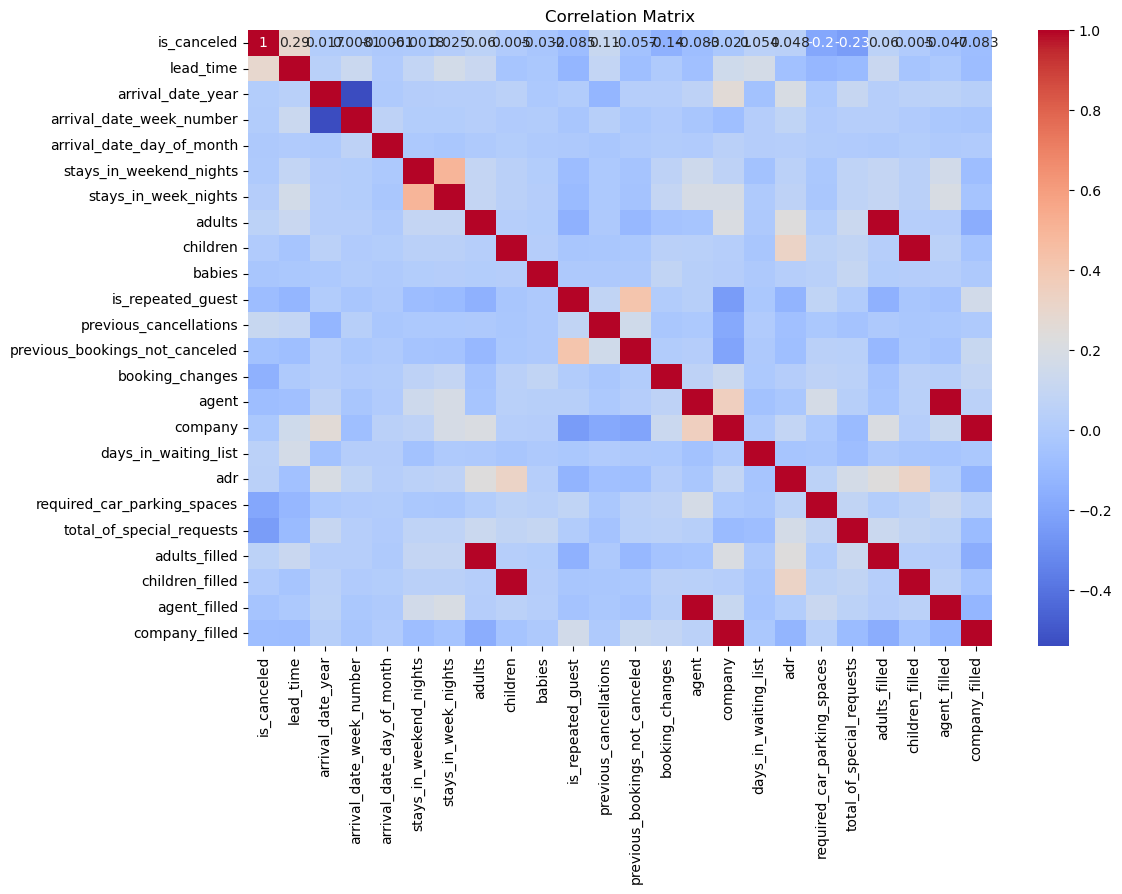

In [64]:
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Categorical Data Analysis

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
label_encoders = {}

In [72]:
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [73]:
print("Encoded DataFrame:")
print(data)

Encoded DataFrame:
        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0           0            0        342               2015                   0   
1           0            0        737               2015                   0   
2           0            0          7               2015                   0   
3           0            0         13               2015                   0   
4           0            0         14               2015                   0   
...       ...          ...        ...                ...                 ...   
119385      0            0         23               2017                   0   
119386      0            0        102               2017                   0   
119387      0            0         34               2017                   0   
119388      0            0        109               2017                   0   
119389      0            0        205               2017                   0   

        arrival_date

In [78]:
from sklearn.preprocessing import StandardScaler

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

# Fit and transform the numerical data
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("DataFrame after label encoding and standard scaling:")
print(data)

DataFrame after label encoding and standard scaling:
        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0           0    -0.767046   2.227043          -1.634793                   0   
1           0    -0.767046   5.923361          -1.634793                   0   
2           0    -0.767046  -0.907810          -1.634793                   0   
3           0    -0.767046  -0.851663          -1.634793                   0   
4           0    -0.767046  -0.842305          -1.634793                   0   
...       ...          ...        ...                ...                 ...   
119385      0    -0.767046  -0.758085           1.192190                   0   
119386      0    -0.767046  -0.018822           1.192190                   0   
119387      0    -0.767046  -0.655150           1.192190                   0   
119388      0    -0.767046   0.046683           1.192190                   0   
119389      0    -0.767046   0.945028           1.192190           

C:\Users\HP\.conda\envs\myenv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


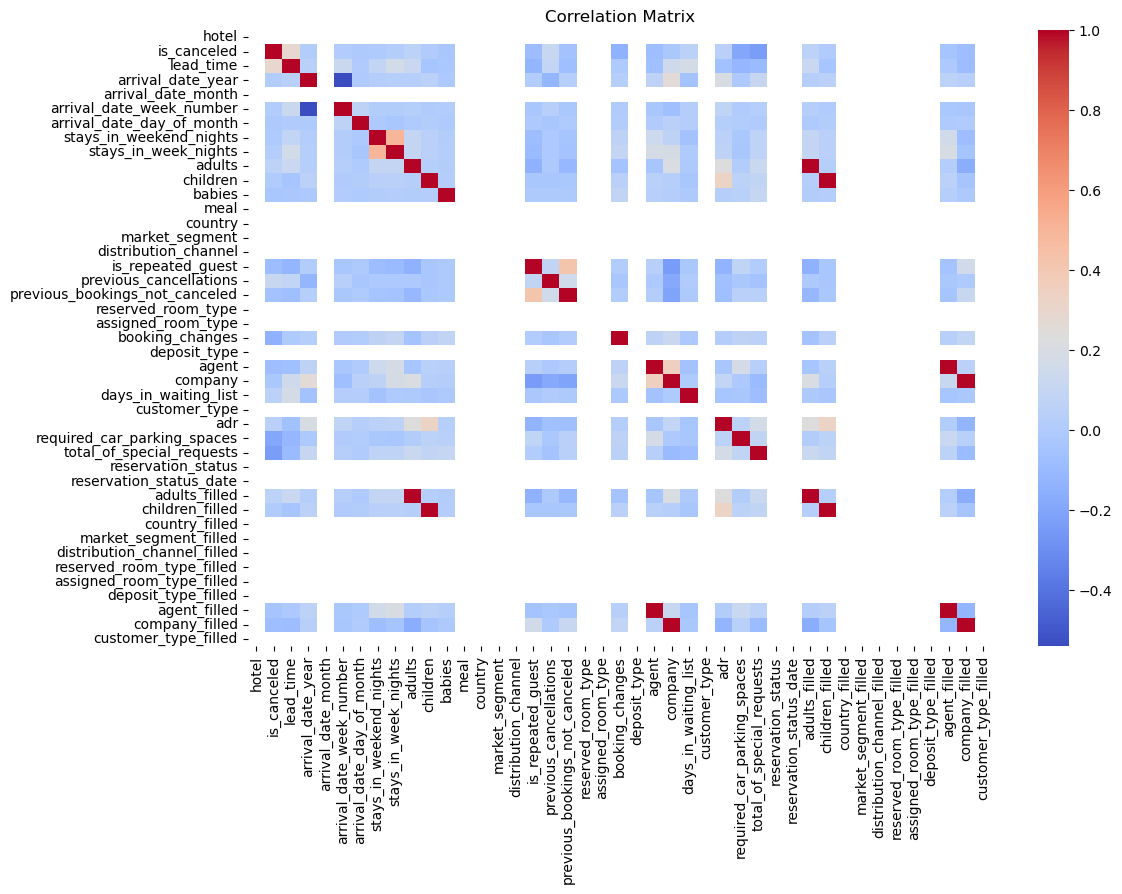

In [79]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Time Series Analysis

### Feature Engineering

In [87]:
data[numerical_columns] = scaler.inverse_transform(data[numerical_columns])

In [82]:
# Create new features based on existing columns, such as calculating the duration of stay from stays_in_weekend_nights and stays_in_week_nights.

In [88]:
data['duration_of_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

In [89]:
data['duration_of_stay']

0         0.0
1         0.0
2         1.0
3         1.0
4         2.0
         ... 
119385    7.0
119386    7.0
119387    7.0
119388    7.0
119389    9.0
Name: duration_of_stay, Length: 119389, dtype: float64

In [85]:
# Derive new features from date columns like arrival_date_year, arrival_date_month, arrival_date_week_number, and arrival_date_day_of_month (e.g., season, month name, day of the week).

### Handling Datetime Columns

In [93]:
data['arrival_date_day_of_month']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
119385    30.0
119386    31.0
119387    31.0
119388    31.0
119389    29.0
Name: arrival_date_day_of_month, Length: 119389, dtype: float64

In [98]:
data['arrival_date'] = pd.to_datetime(data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [95]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool' = False, format: 'str | None' = None, exact: 'bool | lib.NoDefault' = <no_default>, unit: 'str | None' = None, infer_datetime_format: 'lib.NoDefault | bool' = <no_default>, origin: 'str' = 'unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
    Convert argument to datetime.
    
    This function converts a scalar, array-like, :class:`Series` or
    :class:`DataFrame`/dict-like to a pandas datetime object.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime. If a :class:`DataFrame` is provided, the
        method expects minimally the following columns: :const:`"year"`,
        :const:`"mon